In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
EPOCHS = 500
noise_dim = 128
num_examples_to_generate = 16
BUFFER_SIZE = 80000
BATCH_SIZE = 128
NEG_MULTI = 0.2
DROPOUT = 0.7

In [3]:
# Load and preprocess CIFAR10 data
(train_images, _), (_, _) = cifar10.load_data()
train_images = train_images.astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator model
def make_generator_model():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Reshape((8, 8, 256)))
    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Conv2DTranspose(32, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

# Discriminator model
def make_discriminator_model():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Dropout(DROPOUT))
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Dropout(DROPOUT))
    model.add(Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(NEG_MULTI))
    model.add(Dropout(DROPOUT))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(DROPOUT))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(DROPOUT))
    model.add(Dense(1))
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

# Loss and optimizer
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

Epoch 1, Generator Loss: 1.6022429466247559, Discriminator Loss: 0.923281192779541
Epoch 2, Generator Loss: 0.6529212594032288, Discriminator Loss: 1.7402470111846924
Epoch 3, Generator Loss: 0.9302759170532227, Discriminator Loss: 1.3266651630401611
Epoch 4, Generator Loss: 0.7064800262451172, Discriminator Loss: 2.418673038482666
Epoch 5, Generator Loss: 1.472572684288025, Discriminator Loss: 1.01356041431427
Epoch 6, Generator Loss: 2.5900158882141113, Discriminator Loss: 0.8291137218475342
Epoch 7, Generator Loss: 2.0153071880340576, Discriminator Loss: 0.6078660488128662
Epoch 8, Generator Loss: 1.4727586507797241, Discriminator Loss: 0.7566100358963013
Epoch 9, Generator Loss: 1.8649787902832031, Discriminator Loss: 0.7531396746635437
Epoch 10, Generator Loss: 1.4261683225631714, Discriminator Loss: 0.9523996114730835
Epoch 11, Generator Loss: 1.7219634056091309, Discriminator Loss: 0.8589695692062378
Epoch 12, Generator Loss: 1.9391741752624512, Discriminator Loss: 0.60382795333

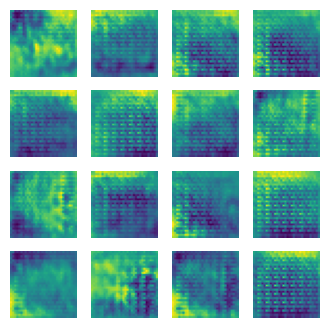

Epoch 50, Generator Loss: 0.6890404224395752, Discriminator Loss: 1.3943092823028564
Epoch 51, Generator Loss: 0.702704906463623, Discriminator Loss: 1.374954104423523
Epoch 52, Generator Loss: 0.7935405969619751, Discriminator Loss: 1.351416826248169
Epoch 53, Generator Loss: 0.7527631521224976, Discriminator Loss: 1.3620538711547852
Epoch 54, Generator Loss: 0.6605237126350403, Discriminator Loss: 1.366600751876831
Epoch 55, Generator Loss: 0.8500539064407349, Discriminator Loss: 1.33479642868042
Epoch 56, Generator Loss: 0.6711634397506714, Discriminator Loss: 1.3912296295166016
Epoch 57, Generator Loss: 0.7109830379486084, Discriminator Loss: 1.3580100536346436
Epoch 58, Generator Loss: 0.6541679501533508, Discriminator Loss: 1.3579447269439697
Epoch 59, Generator Loss: 0.6848592162132263, Discriminator Loss: 1.363090991973877
Epoch 60, Generator Loss: 0.6974871158599854, Discriminator Loss: 1.3711636066436768
Epoch 61, Generator Loss: 0.6658720970153809, Discriminator Loss: 1.3599

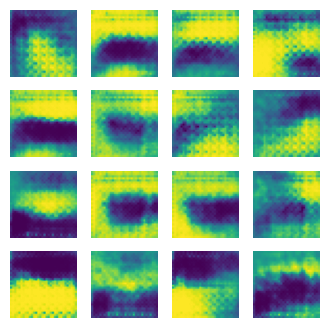

Epoch 100, Generator Loss: 0.6997682452201843, Discriminator Loss: 1.3824273347854614
Epoch 101, Generator Loss: 0.6893914937973022, Discriminator Loss: 1.4113106727600098
Epoch 102, Generator Loss: 0.7067281007766724, Discriminator Loss: 1.4477412700653076
Epoch 103, Generator Loss: 0.6869814991950989, Discriminator Loss: 1.3713102340698242
Epoch 104, Generator Loss: 0.6642953157424927, Discriminator Loss: 1.3550705909729004
Epoch 105, Generator Loss: 0.8179038763046265, Discriminator Loss: 1.3825268745422363
Epoch 106, Generator Loss: 0.6699908375740051, Discriminator Loss: 1.3843662738800049
Epoch 107, Generator Loss: 0.7148020267486572, Discriminator Loss: 1.361581802368164
Epoch 108, Generator Loss: 0.7144210338592529, Discriminator Loss: 1.4060585498809814
Epoch 109, Generator Loss: 0.7693755030632019, Discriminator Loss: 1.3612236976623535
Epoch 110, Generator Loss: 0.6748964190483093, Discriminator Loss: 1.4598684310913086
Epoch 111, Generator Loss: 0.6977454423904419, Discrimi

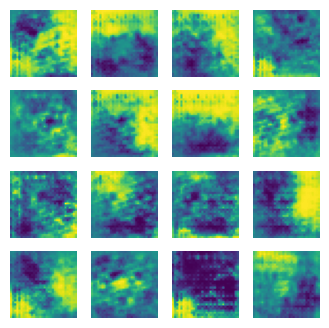

Epoch 150, Generator Loss: 0.7358371615409851, Discriminator Loss: 1.3801536560058594
Epoch 151, Generator Loss: 0.6773496270179749, Discriminator Loss: 1.4363456964492798
Epoch 152, Generator Loss: 0.6861586570739746, Discriminator Loss: 1.4109413623809814
Epoch 153, Generator Loss: 0.5418890714645386, Discriminator Loss: 1.626577615737915
Epoch 154, Generator Loss: 0.7272076606750488, Discriminator Loss: 1.3588457107543945
Epoch 155, Generator Loss: 0.655415415763855, Discriminator Loss: 1.4164133071899414
Epoch 156, Generator Loss: 0.6900770664215088, Discriminator Loss: 1.3502743244171143
Epoch 157, Generator Loss: 0.7626892328262329, Discriminator Loss: 1.3598244190216064
Epoch 158, Generator Loss: 0.7013128995895386, Discriminator Loss: 1.3553178310394287
Epoch 159, Generator Loss: 0.7025988101959229, Discriminator Loss: 1.3892865180969238
Epoch 160, Generator Loss: 0.8084542751312256, Discriminator Loss: 1.358708143234253
Epoch 161, Generator Loss: 0.6676599383354187, Discrimina

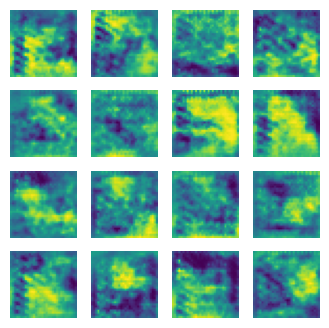

Epoch 200, Generator Loss: 0.7061429619789124, Discriminator Loss: 1.3843752145767212
Epoch 201, Generator Loss: 0.7011923789978027, Discriminator Loss: 1.3706252574920654
Epoch 202, Generator Loss: 0.6895492672920227, Discriminator Loss: 1.3504729270935059
Epoch 203, Generator Loss: 0.9325940608978271, Discriminator Loss: 1.2955039739608765
Epoch 204, Generator Loss: 0.6901605129241943, Discriminator Loss: 1.386950969696045
Epoch 205, Generator Loss: 0.6859616041183472, Discriminator Loss: 1.420635461807251
Epoch 206, Generator Loss: 0.7484905123710632, Discriminator Loss: 1.3835006952285767
Epoch 207, Generator Loss: 0.6519731283187866, Discriminator Loss: 1.389603614807129
Epoch 208, Generator Loss: 0.7083158493041992, Discriminator Loss: 1.3811380863189697
Epoch 209, Generator Loss: 0.7013807892799377, Discriminator Loss: 1.3862123489379883
Epoch 210, Generator Loss: 0.8041435480117798, Discriminator Loss: 1.275264024734497
Epoch 211, Generator Loss: 0.9790737628936768, Discriminat

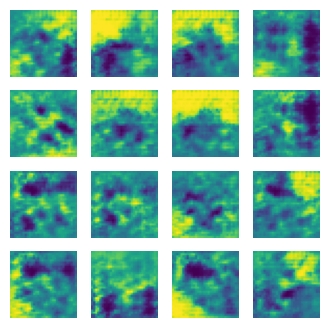

Epoch 250, Generator Loss: 0.6935885548591614, Discriminator Loss: 1.3863601684570312
Epoch 251, Generator Loss: 0.6949448585510254, Discriminator Loss: 1.3840079307556152
Epoch 252, Generator Loss: 0.6907104253768921, Discriminator Loss: 1.3854310512542725
Epoch 253, Generator Loss: 0.8449257612228394, Discriminator Loss: 1.3908109664916992
Epoch 254, Generator Loss: 0.6952016353607178, Discriminator Loss: 1.3836568593978882
Epoch 255, Generator Loss: 0.6732940673828125, Discriminator Loss: 1.3554493188858032
Epoch 256, Generator Loss: 0.6957679986953735, Discriminator Loss: 1.3874075412750244
Epoch 257, Generator Loss: 0.6955255270004272, Discriminator Loss: 1.3846696615219116
Epoch 258, Generator Loss: 0.6839741468429565, Discriminator Loss: 1.391574501991272
Epoch 259, Generator Loss: 0.7174680233001709, Discriminator Loss: 1.3366038799285889
Epoch 260, Generator Loss: 0.6975239515304565, Discriminator Loss: 1.37970769405365
Epoch 261, Generator Loss: 0.7052885890007019, Discrimina

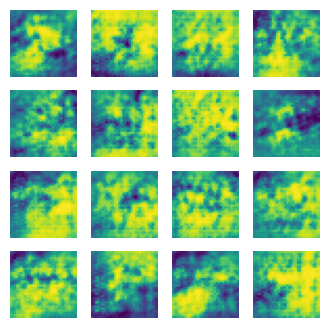

Epoch 300, Generator Loss: 0.7119499444961548, Discriminator Loss: 1.3737043142318726
Epoch 301, Generator Loss: 0.6940696239471436, Discriminator Loss: 1.384953260421753
Epoch 302, Generator Loss: 0.6917580366134644, Discriminator Loss: 1.3851866722106934
Epoch 303, Generator Loss: 0.6968440413475037, Discriminator Loss: 1.3881345987319946
Epoch 304, Generator Loss: 0.6923098564147949, Discriminator Loss: 1.3858047723770142
Epoch 305, Generator Loss: 0.6809867024421692, Discriminator Loss: 1.3840388059616089
Epoch 306, Generator Loss: 0.6962587237358093, Discriminator Loss: 1.3850206136703491
Epoch 307, Generator Loss: 0.6918911933898926, Discriminator Loss: 1.3861286640167236
Epoch 308, Generator Loss: 0.6880220770835876, Discriminator Loss: 1.3850600719451904
Epoch 309, Generator Loss: 0.7091729044914246, Discriminator Loss: 1.3812015056610107
Epoch 310, Generator Loss: 0.6855537295341492, Discriminator Loss: 1.3847365379333496
Epoch 311, Generator Loss: 0.7021068930625916, Discrimi

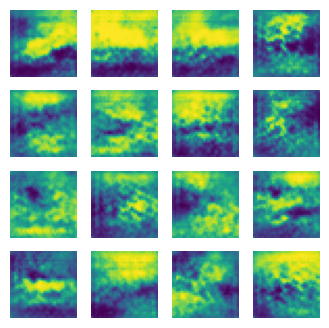

Epoch 350, Generator Loss: 0.702444314956665, Discriminator Loss: 1.3863590955734253
Epoch 351, Generator Loss: 0.6910630464553833, Discriminator Loss: 1.3862180709838867
Epoch 352, Generator Loss: 0.6937886476516724, Discriminator Loss: 1.3843929767608643
Epoch 353, Generator Loss: 0.7017324566841125, Discriminator Loss: 1.3832461833953857
Epoch 354, Generator Loss: 0.7282354235649109, Discriminator Loss: 1.391826868057251
Epoch 355, Generator Loss: 0.6831440925598145, Discriminator Loss: 1.393172264099121
Epoch 356, Generator Loss: 0.6746718883514404, Discriminator Loss: 1.3759827613830566
Epoch 357, Generator Loss: 0.6956202983856201, Discriminator Loss: 1.3851845264434814
Epoch 358, Generator Loss: 0.6837158799171448, Discriminator Loss: 1.3835654258728027
Epoch 359, Generator Loss: 0.7003268599510193, Discriminator Loss: 1.386233925819397
Epoch 360, Generator Loss: 0.6941452622413635, Discriminator Loss: 1.3868834972381592
Epoch 361, Generator Loss: 0.6485065221786499, Discriminat

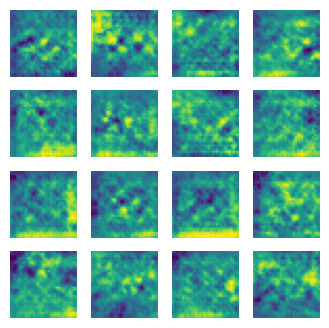

Epoch 400, Generator Loss: 0.6552549004554749, Discriminator Loss: 1.385298728942871
Epoch 401, Generator Loss: 0.6905460357666016, Discriminator Loss: 1.36091148853302
Epoch 402, Generator Loss: 0.6897614598274231, Discriminator Loss: 1.380712866783142
Epoch 403, Generator Loss: 0.6841463446617126, Discriminator Loss: 1.3365049362182617
Epoch 404, Generator Loss: 0.7072016596794128, Discriminator Loss: 1.4035544395446777
Epoch 405, Generator Loss: 0.6999805569648743, Discriminator Loss: 1.3795150518417358
Epoch 406, Generator Loss: 0.7061436176300049, Discriminator Loss: 1.3824341297149658
Epoch 407, Generator Loss: 0.6893867254257202, Discriminator Loss: 1.3847891092300415
Epoch 408, Generator Loss: 0.6923989653587341, Discriminator Loss: 1.385727882385254
Epoch 409, Generator Loss: 0.7176669836044312, Discriminator Loss: 1.4024487733840942
Epoch 410, Generator Loss: 0.7258164286613464, Discriminator Loss: 1.3649402856826782
Epoch 411, Generator Loss: 0.7206772565841675, Discriminato

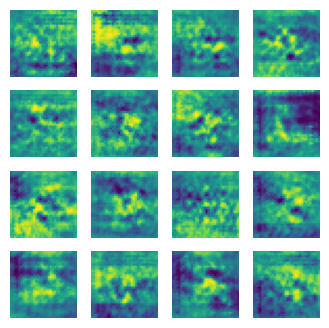

Epoch 450, Generator Loss: 0.6982382535934448, Discriminator Loss: 1.3866260051727295
Epoch 451, Generator Loss: 0.7038208842277527, Discriminator Loss: 1.3618957996368408
Epoch 452, Generator Loss: 0.6896393299102783, Discriminator Loss: 1.388223648071289
Epoch 453, Generator Loss: 0.685532808303833, Discriminator Loss: 1.389123797416687
Epoch 454, Generator Loss: 0.7333929538726807, Discriminator Loss: 1.3715989589691162
Epoch 455, Generator Loss: 0.7382519245147705, Discriminator Loss: 1.423743486404419
Epoch 456, Generator Loss: 0.6896588206291199, Discriminator Loss: 1.3852310180664062
Epoch 457, Generator Loss: 0.6831167340278625, Discriminator Loss: 1.384128451347351
Epoch 458, Generator Loss: 0.6914206147193909, Discriminator Loss: 1.3783934116363525
Epoch 459, Generator Loss: 1.262513279914856, Discriminator Loss: 1.2381443977355957
Epoch 460, Generator Loss: 0.7064329981803894, Discriminator Loss: 1.3631322383880615
Epoch 461, Generator Loss: 0.6883507966995239, Discriminator

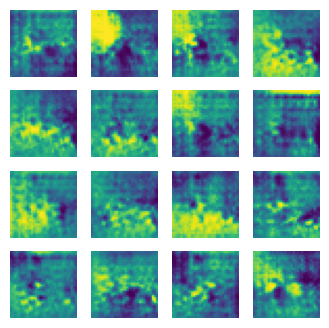

Epoch 500, Generator Loss: 0.692145586013794, Discriminator Loss: 1.3833041191101074
Epoch 501, Generator Loss: 0.6769000291824341, Discriminator Loss: 1.389914870262146
Epoch 502, Generator Loss: 0.7300584316253662, Discriminator Loss: 1.3592331409454346
Epoch 503, Generator Loss: 0.6924756169319153, Discriminator Loss: 1.3837776184082031
Epoch 504, Generator Loss: 0.7210225462913513, Discriminator Loss: 1.3702096939086914
Epoch 505, Generator Loss: 0.6651226878166199, Discriminator Loss: 1.387570858001709
Epoch 506, Generator Loss: 0.6502085328102112, Discriminator Loss: 1.5375697612762451
Epoch 507, Generator Loss: 0.6825213432312012, Discriminator Loss: 1.3792834281921387
Epoch 508, Generator Loss: 0.6723353266716003, Discriminator Loss: 1.4176632165908813
Epoch 509, Generator Loss: 0.6914952993392944, Discriminator Loss: 1.386867642402649
Epoch 510, Generator Loss: 0.687725841999054, Discriminator Loss: 1.3797847032546997
Epoch 511, Generator Loss: 0.7135764360427856, Discriminato

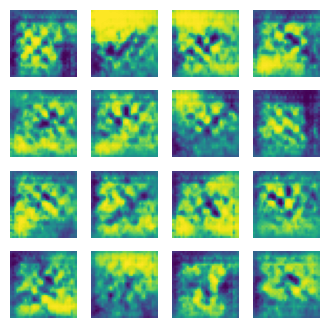

Epoch 550, Generator Loss: 0.7004269361495972, Discriminator Loss: 1.3829774856567383
Epoch 551, Generator Loss: 0.6956613063812256, Discriminator Loss: 1.3914926052093506
Epoch 552, Generator Loss: 0.6954253911972046, Discriminator Loss: 1.3875024318695068
Epoch 553, Generator Loss: 0.6811224818229675, Discriminator Loss: 1.3840596675872803
Epoch 554, Generator Loss: 0.7312860488891602, Discriminator Loss: 1.3691585063934326
Epoch 555, Generator Loss: 0.7014049291610718, Discriminator Loss: 1.3847228288650513
Epoch 556, Generator Loss: 0.6888760924339294, Discriminator Loss: 1.3872864246368408
Epoch 557, Generator Loss: 0.7011628150939941, Discriminator Loss: 1.3843581676483154
Epoch 558, Generator Loss: 0.6798055171966553, Discriminator Loss: 1.3952476978302002
Epoch 559, Generator Loss: 0.6932879686355591, Discriminator Loss: 1.3477449417114258
Epoch 560, Generator Loss: 0.6938951015472412, Discriminator Loss: 1.389723300933838
Epoch 561, Generator Loss: 0.6997831463813782, Discrimi

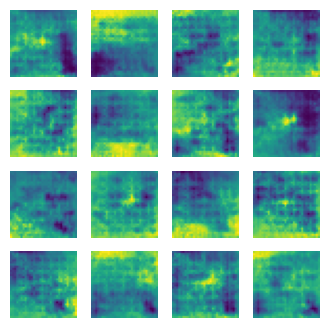

Epoch 600, Generator Loss: 0.7086666226387024, Discriminator Loss: 1.3758684396743774
Epoch 601, Generator Loss: 0.6801082491874695, Discriminator Loss: 1.3783378601074219
Epoch 602, Generator Loss: 0.6950673460960388, Discriminator Loss: 1.3850388526916504
Epoch 603, Generator Loss: 0.6933479309082031, Discriminator Loss: 1.3833324909210205
Epoch 604, Generator Loss: 0.6860348582267761, Discriminator Loss: 1.3806345462799072
Epoch 605, Generator Loss: 0.6761019825935364, Discriminator Loss: 1.3815724849700928
Epoch 606, Generator Loss: 0.6665014028549194, Discriminator Loss: 1.4004490375518799
Epoch 607, Generator Loss: 0.689085841178894, Discriminator Loss: 1.395225167274475
Epoch 608, Generator Loss: 0.6838635802268982, Discriminator Loss: 1.3801259994506836
Epoch 609, Generator Loss: 0.6974181532859802, Discriminator Loss: 1.3712372779846191
Epoch 610, Generator Loss: 0.6874380111694336, Discriminator Loss: 1.4024631977081299
Epoch 611, Generator Loss: 0.6964707970619202, Discrimin

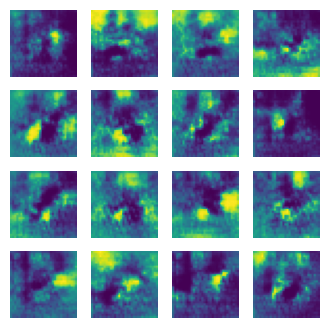

Epoch 650, Generator Loss: 0.7117472290992737, Discriminator Loss: 1.3608745336532593
Epoch 651, Generator Loss: 0.7073116898536682, Discriminator Loss: 1.3871979713439941
Epoch 652, Generator Loss: 0.6983826160430908, Discriminator Loss: 1.3840808868408203
Epoch 653, Generator Loss: 0.6982058882713318, Discriminator Loss: 1.3877142667770386
Epoch 654, Generator Loss: 0.6935432553291321, Discriminator Loss: 1.3862428665161133
Epoch 655, Generator Loss: 0.7050833106040955, Discriminator Loss: 1.3941328525543213
Epoch 656, Generator Loss: 0.7057991027832031, Discriminator Loss: 1.3857879638671875
Epoch 657, Generator Loss: 0.6923727989196777, Discriminator Loss: 1.3744277954101562
Epoch 658, Generator Loss: 0.5867977738380432, Discriminator Loss: 1.5321992635726929
Epoch 659, Generator Loss: 0.6959856748580933, Discriminator Loss: 1.389686107635498
Epoch 660, Generator Loss: 0.6672680974006653, Discriminator Loss: 1.4048283100128174
Epoch 661, Generator Loss: 0.6990084052085876, Discrimi

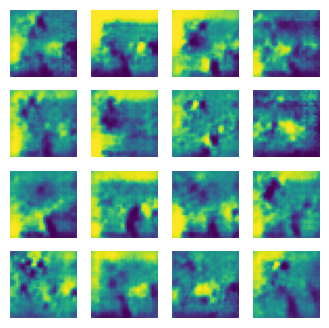

Epoch 700, Generator Loss: 0.6839406490325928, Discriminator Loss: 1.3670170307159424
Epoch 701, Generator Loss: 0.7098076343536377, Discriminator Loss: 1.3756815195083618
Epoch 702, Generator Loss: 0.7351791262626648, Discriminator Loss: 1.3145873546600342
Epoch 703, Generator Loss: 0.6567214727401733, Discriminator Loss: 1.4343723058700562
Epoch 704, Generator Loss: 0.6824162006378174, Discriminator Loss: 1.3891396522521973
Epoch 705, Generator Loss: 0.7218461632728577, Discriminator Loss: 1.3726513385772705
Epoch 706, Generator Loss: 0.7116814851760864, Discriminator Loss: 1.377057433128357
Epoch 707, Generator Loss: 0.6356960535049438, Discriminator Loss: 1.4003268480300903
Epoch 708, Generator Loss: 0.7039821743965149, Discriminator Loss: 1.3778555393218994
Epoch 709, Generator Loss: 0.7001518607139587, Discriminator Loss: 1.3835179805755615
Epoch 710, Generator Loss: 0.7064721584320068, Discriminator Loss: 1.383422613143921
Epoch 711, Generator Loss: 0.7177364826202393, Discrimin

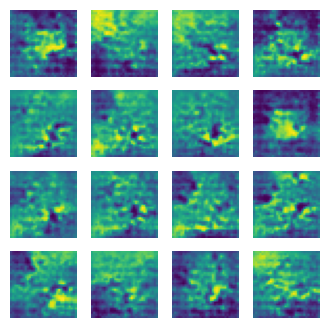

Epoch 750, Generator Loss: 0.7036981582641602, Discriminator Loss: 1.3797173500061035
Epoch 751, Generator Loss: 0.6928330063819885, Discriminator Loss: 1.3793134689331055
Epoch 752, Generator Loss: 0.687890887260437, Discriminator Loss: 1.4019924402236938
Epoch 753, Generator Loss: 0.7024139165878296, Discriminator Loss: 1.4132130146026611
Epoch 754, Generator Loss: 0.7004917860031128, Discriminator Loss: 1.3853840827941895
Epoch 755, Generator Loss: 0.7377350330352783, Discriminator Loss: 1.3570630550384521
Epoch 756, Generator Loss: 0.6906117796897888, Discriminator Loss: 1.3835484981536865
Epoch 757, Generator Loss: 0.7085689306259155, Discriminator Loss: 1.3659718036651611
Epoch 758, Generator Loss: 0.7003207206726074, Discriminator Loss: 1.3871517181396484
Epoch 759, Generator Loss: 0.702297568321228, Discriminator Loss: 1.3824833631515503
Epoch 760, Generator Loss: 0.6955621242523193, Discriminator Loss: 1.347303867340088
Epoch 761, Generator Loss: 0.6877007484436035, Discrimina

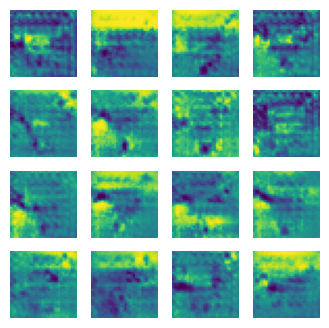

Epoch 800, Generator Loss: 0.6958404779434204, Discriminator Loss: 1.3888815641403198
Epoch 801, Generator Loss: 0.6837949752807617, Discriminator Loss: 1.3643875122070312
Epoch 802, Generator Loss: 0.6959554553031921, Discriminator Loss: 1.3832437992095947
Epoch 803, Generator Loss: 0.6997299194335938, Discriminator Loss: 1.3861206769943237
Epoch 804, Generator Loss: 0.6920548677444458, Discriminator Loss: 1.3879154920578003
Epoch 805, Generator Loss: 0.6960873603820801, Discriminator Loss: 1.3901653289794922
Epoch 806, Generator Loss: 0.7080061435699463, Discriminator Loss: 1.3964672088623047
Epoch 807, Generator Loss: 0.6899976134300232, Discriminator Loss: 1.3857431411743164
Epoch 808, Generator Loss: 0.6941347122192383, Discriminator Loss: 1.3788237571716309
Epoch 809, Generator Loss: 0.7034664750099182, Discriminator Loss: 1.3760852813720703
Epoch 810, Generator Loss: 0.6963632702827454, Discriminator Loss: 1.3827378749847412
Epoch 811, Generator Loss: 0.6884688138961792, Discrim

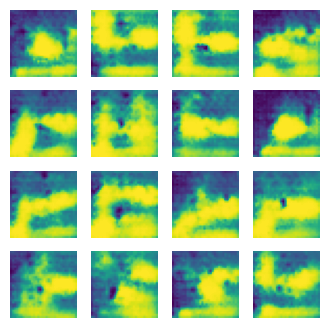

Epoch 850, Generator Loss: 0.6902981400489807, Discriminator Loss: 1.380149006843567
Epoch 851, Generator Loss: 0.7010793089866638, Discriminator Loss: 1.3758106231689453
Epoch 852, Generator Loss: 0.707690954208374, Discriminator Loss: 1.3762152194976807
Epoch 853, Generator Loss: 0.6751465797424316, Discriminator Loss: 1.3874757289886475
Epoch 854, Generator Loss: 0.7340352535247803, Discriminator Loss: 1.347569227218628
Epoch 855, Generator Loss: 0.6748613119125366, Discriminator Loss: 1.3572618961334229
Epoch 856, Generator Loss: 0.716044008731842, Discriminator Loss: 1.4044625759124756
Epoch 857, Generator Loss: 0.6891145706176758, Discriminator Loss: 1.3832036256790161
Epoch 858, Generator Loss: 0.7050464749336243, Discriminator Loss: 1.3681445121765137
Epoch 859, Generator Loss: 0.6999748945236206, Discriminator Loss: 1.3905634880065918
Epoch 860, Generator Loss: 0.6864628791809082, Discriminator Loss: 1.4015923738479614
Epoch 861, Generator Loss: 0.7095454931259155, Discriminat

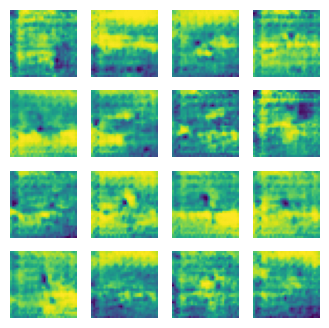

Epoch 900, Generator Loss: 0.7288254499435425, Discriminator Loss: 1.37046480178833
Epoch 901, Generator Loss: 0.703768789768219, Discriminator Loss: 1.375119924545288
Epoch 902, Generator Loss: 0.7068201303482056, Discriminator Loss: 1.3887975215911865
Epoch 903, Generator Loss: 0.6931741237640381, Discriminator Loss: 1.3867518901824951
Epoch 904, Generator Loss: 0.697124183177948, Discriminator Loss: 1.3807930946350098
Epoch 905, Generator Loss: 0.7054429054260254, Discriminator Loss: 1.3803606033325195
Epoch 906, Generator Loss: 0.6919177174568176, Discriminator Loss: 1.379173994064331
Epoch 907, Generator Loss: 0.738083004951477, Discriminator Loss: 1.3813084363937378
Epoch 908, Generator Loss: 0.7014412879943848, Discriminator Loss: 1.3855993747711182
Epoch 909, Generator Loss: 0.6938223838806152, Discriminator Loss: 1.3884263038635254
Epoch 910, Generator Loss: 0.6870849132537842, Discriminator Loss: 1.379828691482544
Epoch 911, Generator Loss: 0.7039035558700562, Discriminator L

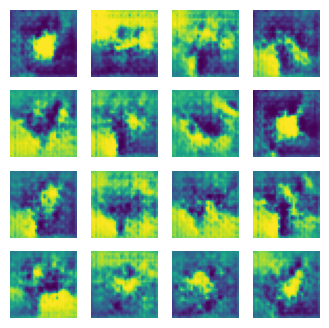

Epoch 950, Generator Loss: 0.7217848300933838, Discriminator Loss: 1.3635807037353516
Epoch 951, Generator Loss: 0.6867744326591492, Discriminator Loss: 1.3763326406478882
Epoch 952, Generator Loss: 0.7084653377532959, Discriminator Loss: 1.3889670372009277
Epoch 953, Generator Loss: 0.6865899562835693, Discriminator Loss: 1.3818610906600952
Epoch 954, Generator Loss: 0.6480135917663574, Discriminator Loss: 1.440018653869629
Epoch 955, Generator Loss: 0.7700088024139404, Discriminator Loss: 1.3326363563537598
Epoch 956, Generator Loss: 0.6722085475921631, Discriminator Loss: 1.3790481090545654
Epoch 957, Generator Loss: 0.8422552347183228, Discriminator Loss: 1.2891124486923218
Epoch 958, Generator Loss: 0.7177444100379944, Discriminator Loss: 1.3844162225723267
Epoch 959, Generator Loss: 0.7089967727661133, Discriminator Loss: 1.3897969722747803
Epoch 960, Generator Loss: 0.6837167143821716, Discriminator Loss: 1.3936171531677246
Epoch 961, Generator Loss: 0.8285128474235535, Discrimi

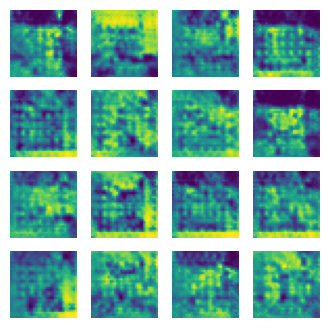

Epoch 1000, Generator Loss: 0.7146610021591187, Discriminator Loss: 1.3882567882537842
Epoch 1001, Generator Loss: 0.710417628288269, Discriminator Loss: 1.3885164260864258
Epoch 1002, Generator Loss: 0.706735372543335, Discriminator Loss: 1.3744220733642578
Epoch 1003, Generator Loss: 0.7169601917266846, Discriminator Loss: 1.3890153169631958
Epoch 1004, Generator Loss: 0.6875278949737549, Discriminator Loss: 1.384452223777771
Epoch 1005, Generator Loss: 0.6963410377502441, Discriminator Loss: 1.3696329593658447
Epoch 1006, Generator Loss: 0.6539650559425354, Discriminator Loss: 1.348245620727539
Epoch 1007, Generator Loss: 0.6969698071479797, Discriminator Loss: 1.362109899520874
Epoch 1008, Generator Loss: 0.7128950953483582, Discriminator Loss: 1.3590502738952637
Epoch 1009, Generator Loss: 0.7268560528755188, Discriminator Loss: 1.3710381984710693
Epoch 1010, Generator Loss: 0.71109938621521, Discriminator Loss: 1.365081548690796
Epoch 1011, Generator Loss: 0.7083530426025391, Dis

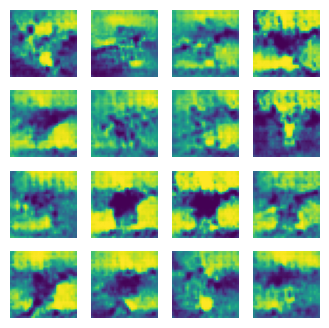

Epoch 1050, Generator Loss: 0.732075035572052, Discriminator Loss: 1.4140591621398926


KeyboardInterrupt: 

: 

In [4]:
# Seed for visualization
seed = tf.random.normal([num_examples_to_generate, noise_dim])

generator_losses = []
discriminator_losses = []

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.axis('off')

    plt.savefig('save/epoch_{:04d}.png'.format(epoch))
    plt.show()


def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            generator_losses.append(gen_loss.numpy())
            discriminator_losses.append(disc_loss.numpy())

        if (epoch + 1) % 50 == 0:
            generate_and_save_images(generator, epoch, seed)

        print(f"Epoch {epoch+1}, Generator Loss: {gen_loss.numpy()}, Discriminator Loss: {disc_loss.numpy()}")
        
train(train_dataset, EPOCHS)

# Save the Model
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')

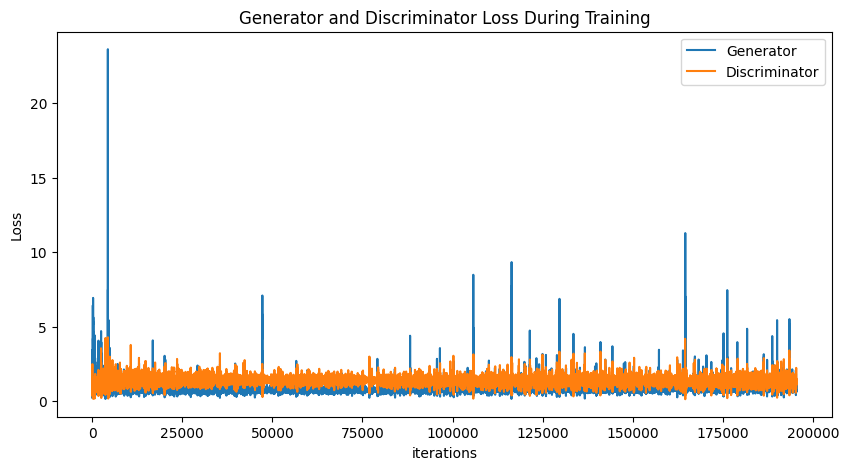

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(generator_losses,label="Generator")
plt.plot(discriminator_losses,label="Discriminator")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


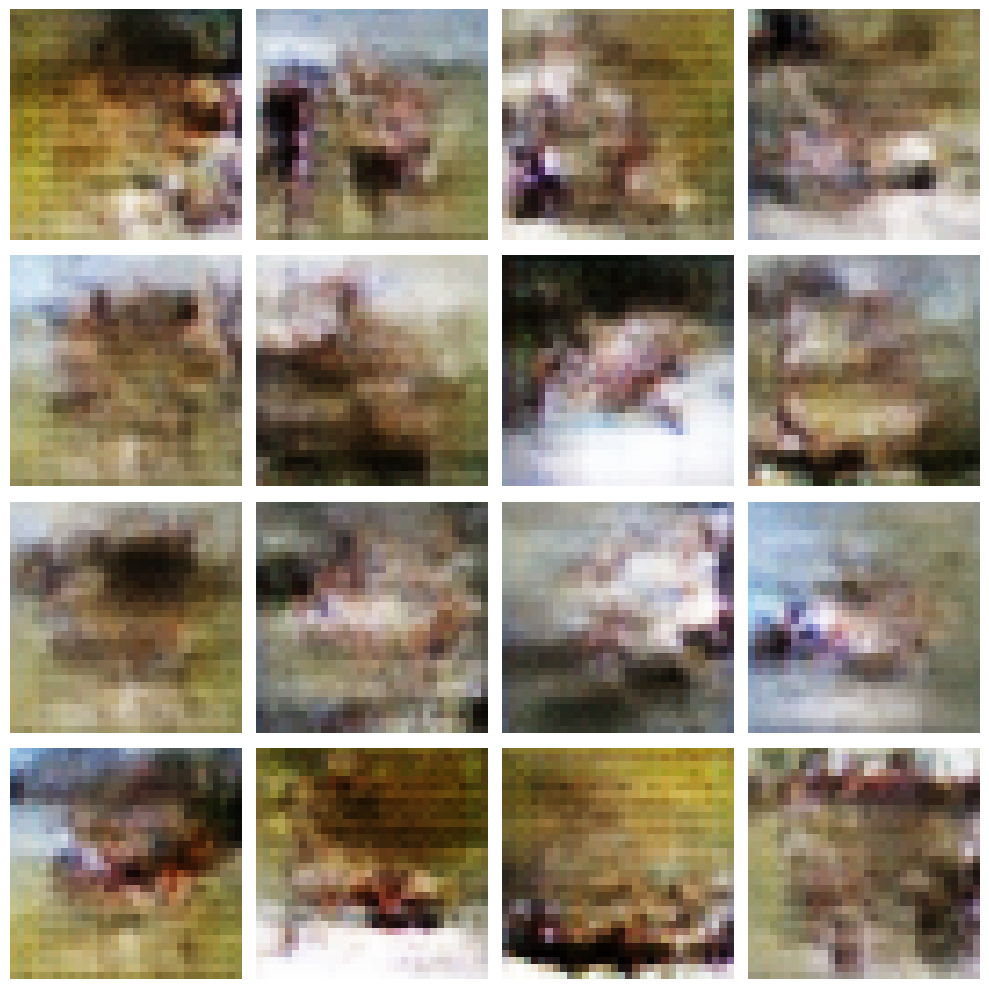

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the generator model
generator = tf.keras.models.load_model('generator_model.h5')
generator.compile(optimizer=generator_optimizer, loss=generator_loss)

def generate_and_show_images(model, num_images=16, dim=(4, 4), figsize=(10, 10)):
    noise = tf.random.normal([num_images, noise_dim])
    generated_images = model(noise, training=False)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, :] * 0.5 + 0.5)  # Rescale the images from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate and display images
generate_and_show_images(generator)
